In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
chandigarh_meteo = pd.read_csv('/kaggle/input/chandigarh-aqi/Chandigarh/Metrological Data/Chandigarh.csv', delimiter=',')
chandigarh_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,7.8,93,0.0,975.9,6.4,14.0,344,331
1,2024-01-01T01:00,8.9,98,0.0,977.8,4.8,6.9,312,313
2,2024-01-01T02:00,8.8,97,0.0,978.2,4.3,4.9,312,306
3,2024-01-01T03:00,9.2,96,0.0,978.6,3.6,3.8,307,319
4,2024-01-01T04:00,9.8,97,0.0,979.0,3.4,2.8,288,310
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.9,100,0.0,977.8,1.0,6.6,329,325
8780,2024-12-31T20:00,7.7,100,0.0,977.7,1.6,6.1,333,326
8781,2024-12-31T21:00,8.6,96,0.0,977.4,7.6,16.5,326,337
8782,2024-12-31T22:00,8.6,95,0.0,976.7,12.0,24.1,319,327


In [3]:
chandigarh_pollutants = pd.read_csv('/kaggle/input/chandigarh-aqi/Chandigarh/Pollutants/Chandigarh.csv', delimiter= ',')
chandigarh_pollutants['Timestamp'] = chandigarh_meteo['time']
chandigarh_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
chandigarh_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,115.28,178.37,3.52,17.22,12.05,37.91,2.84,1.26,6.33,...,3.26,10.51,99.59,0.28,249.24,0.0,0.0,11.03,NaN,NaN
1,2024-01-01T01:00,105.21,166.23,2.64,14.54,9.86,37.26,2.71,1.22,8.88,...,3.09,10.41,99.59,0.32,304.19,0.0,0.0,10.98,NaN,NaN
2,2024-01-01T02:00,97.99,154.18,2.47,13.12,8.96,36.60,2.60,1.10,10.26,...,3.15,10.16,99.59,0.41,286.55,0.0,0.0,11.07,NaN,NaN
3,2024-01-01T03:00,86.91,130.71,2.32,11.55,8.04,34.67,2.52,1.02,11.29,...,2.77,9.73,99.59,0.38,243.49,0.0,0.0,11.07,NaN,NaN
4,2024-01-01T04:00,74.47,104.11,1.90,11.86,7.74,32.96,3.16,0.98,10.43,...,2.43,9.49,99.59,0.36,293.28,0.0,0.0,11.04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,156.83,220.51,4.04,28.84,18.58,49.34,11.07,0.91,16.08,...,1.74,13.72,85.05,0.26,269.62,0.0,0.0,8.11,NaN,NaN
8780,2024-12-31T20:00,166.02,226.05,3.63,25.98,16.76,49.59,10.35,0.86,19.09,...,1.39,13.62,85.38,0.28,314.42,0.0,0.0,8.22,NaN,NaN
8781,2024-12-31T21:00,157.22,216.85,4.11,25.07,16.64,50.75,8.78,0.87,17.57,...,1.29,13.53,85.72,0.24,202.50,0.0,0.0,8.11,NaN,NaN
8782,2024-12-31T22:00,146.56,207.88,3.84,24.31,15.97,52.98,8.50,0.87,16.92,...,1.24,13.42,86.29,0.33,215.49,0.0,0.0,8.11,NaN,NaN


In [4]:
chandigarh = pd.merge(chandigarh_meteo.iloc[:, :], chandigarh_pollutants.iloc[:, 0:3], on='time')
chandigarh

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,7.8,93,0.0,975.9,6.4,14.0,344,331,115.28,178.37
1,2024-01-01T01:00,8.9,98,0.0,977.8,4.8,6.9,312,313,105.21,166.23
2,2024-01-01T02:00,8.8,97,0.0,978.2,4.3,4.9,312,306,97.99,154.18
3,2024-01-01T03:00,9.2,96,0.0,978.6,3.6,3.8,307,319,86.91,130.71
4,2024-01-01T04:00,9.8,97,0.0,979.0,3.4,2.8,288,310,74.47,104.11
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.9,100,0.0,977.8,1.0,6.6,329,325,156.83,220.51
8780,2024-12-31T20:00,7.7,100,0.0,977.7,1.6,6.1,333,326,166.02,226.05
8781,2024-12-31T21:00,8.6,96,0.0,977.4,7.6,16.5,326,337,157.22,216.85
8782,2024-12-31T22:00,8.6,95,0.0,976.7,12.0,24.1,319,327,146.56,207.88


In [5]:
chandigarh['city'] = 'Chandigarh'
chandigarh

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,7.8,93,0.0,975.9,6.4,14.0,344,331,115.28,178.37,Chandigarh
1,2024-01-01T01:00,8.9,98,0.0,977.8,4.8,6.9,312,313,105.21,166.23,Chandigarh
2,2024-01-01T02:00,8.8,97,0.0,978.2,4.3,4.9,312,306,97.99,154.18,Chandigarh
3,2024-01-01T03:00,9.2,96,0.0,978.6,3.6,3.8,307,319,86.91,130.71,Chandigarh
4,2024-01-01T04:00,9.8,97,0.0,979.0,3.4,2.8,288,310,74.47,104.11,Chandigarh
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.9,100,0.0,977.8,1.0,6.6,329,325,156.83,220.51,Chandigarh
8780,2024-12-31T20:00,7.7,100,0.0,977.7,1.6,6.1,333,326,166.02,226.05,Chandigarh
8781,2024-12-31T21:00,8.6,96,0.0,977.4,7.6,16.5,326,337,157.22,216.85,Chandigarh
8782,2024-12-31T22:00,8.6,95,0.0,976.7,12.0,24.1,319,327,146.56,207.88,Chandigarh


In [6]:
chandigarh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8772 non-null   float64
 10  PM10 (µg/m³)              8779 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
chandigarh = chandigarh.interpolate()
chandigarh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    chandigarh[delay1_col] = chandigarh[col].shift(1)
    delay2_col = col + "_delay2"
    chandigarh[delay2_col] = chandigarh[col].shift(2)
    chandigarh.loc[0, delay1_col] = chandigarh[col].iloc[-1]
    chandigarh.loc[1, delay2_col] = chandigarh[col].iloc[-1]
    chandigarh.loc[0, delay2_col] = chandigarh[col].iloc[-2]

chandigarh

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,7.8,93,0.0,975.9,6.4,14.0,344,331,115.28,178.37,Chandigarh,143.56,146.56,213.96,207.88
1,2024-01-01T01:00,8.9,98,0.0,977.8,4.8,6.9,312,313,105.21,166.23,Chandigarh,115.28,143.56,178.37,213.96
2,2024-01-01T02:00,8.8,97,0.0,978.2,4.3,4.9,312,306,97.99,154.18,Chandigarh,105.21,115.28,166.23,178.37
3,2024-01-01T03:00,9.2,96,0.0,978.6,3.6,3.8,307,319,86.91,130.71,Chandigarh,97.99,105.21,154.18,166.23
4,2024-01-01T04:00,9.8,97,0.0,979.0,3.4,2.8,288,310,74.47,104.11,Chandigarh,86.91,97.99,130.71,154.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.9,100,0.0,977.8,1.0,6.6,329,325,156.83,220.51,Chandigarh,153.75,143.61,207.68,188.56
8780,2024-12-31T20:00,7.7,100,0.0,977.7,1.6,6.1,333,326,166.02,226.05,Chandigarh,156.83,153.75,220.51,207.68
8781,2024-12-31T21:00,8.6,96,0.0,977.4,7.6,16.5,326,337,157.22,216.85,Chandigarh,166.02,156.83,226.05,220.51
8782,2024-12-31T22:00,8.6,95,0.0,976.7,12.0,24.1,319,327,146.56,207.88,Chandigarh,157.22,166.02,216.85,226.05


In [9]:
chandigarh_data = chandigarh

In [10]:
chandigarh_data['city'] = chandigarh_data['city'].astype('category')

In [11]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [12]:
X, y = chandigarh_data[input_cols], chandigarh_data[target_cols]

In [13]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [14]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [15]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
pred_check = model.predict(X)

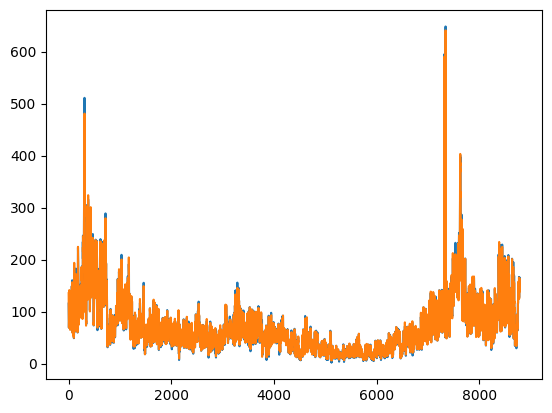

In [17]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9878698756106764


In [19]:
import joblib
joblib.dump(model, 'Chandigarh_PM2.5_µgm³.pkl')

['Chandigarh_PM2.5_µgm³.pkl']

In [20]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
pred_check2 = model.predict(X)

In [22]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9705746023226661


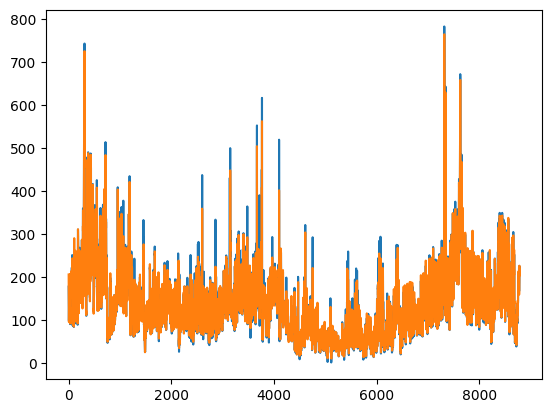

In [23]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [24]:
joblib.dump(model, 'Chandigarh_PM10_µgm³.pkl')

['Chandigarh_PM10_µgm³.pkl']